### Importación de Tensorflow

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#importar celdas recurrentes 
from tensorflow.compat.v1.nn import rnn_cell
import csv
%matplotlib inline

### Importación de datos 

In [12]:
! git clone https://github.com/Duchanoy/BolsaDeValores.git

Cloning into 'BolsaDeValores'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [13]:
!ls
%cd BolsaDeValores
!ls

BolsaDeValores	sample_data
/content/BolsaDeValores
hpq.us.txt  README.md


In [14]:
date=[]
High=[]
Low=[]
with open('hpq.us.txt', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for i,row in enumerate(spamreader):
        if i == 0:
            print(row)
            print(len(row))
        else: 
            date.append(row[0])
            
            High.append(float(row[2]))
            Low.append(float(row[3]))

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt']
7


In [15]:
len(date)

12075

### verificando los datos de prueba

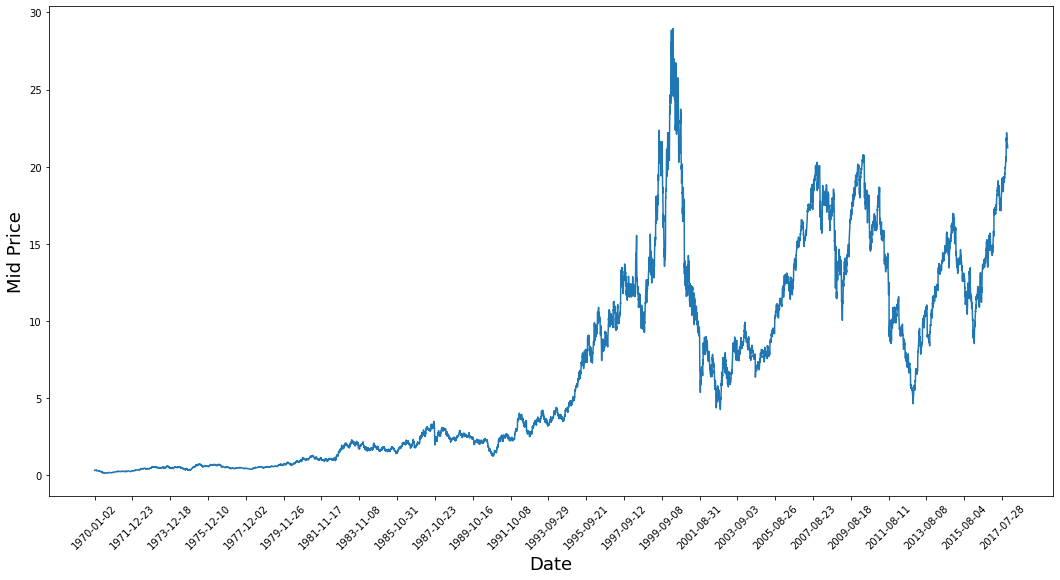

In [16]:
plt.figure(figsize = (18,9))
plt.plot(range(len(date)),(np.array(Low)+np.array(High))/2.0)
plt.xticks(range(0,len(date),500),date[0::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [0]:
mid_prices = (np.array(Low)+np.array(High))/2.0

In [0]:
Train_data = mid_prices[:11000]
Test_data = mid_prices

In [0]:
def data_genertor(data, window , distance=0):
    x=[]
    y=[]
    for i in range(len(data)-window-distance):
        x.append(data[i:i+window])
        y.append(data[i+window+distance])
    return np.array(x),np.array(y)

In [0]:
train_x,train_y=data_genertor(Train_data, 10 , 0)

In [21]:
print(train_x.shape)
print(train_y.shape)

(10990, 10)
(10990,)


In [0]:
test_x,test_y=data_genertor(Test_data, 10 , 0)

In [23]:
print(test_x.shape)
print(test_y.shape)

(12065, 10)
(12065,)


### Declarando la arquitectura

Generando función 

In [24]:
RNN=tf.keras.Sequential()
RNN.add(tf.keras.layers.LSTM(units=1,input_shape=(10,1),activation="relu"))
RNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [0]:
RNN.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
#  input shape must be [samples, time steps, features]
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1],1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1],1))

RNN.fit(train_x,train_y,
                epochs=100,
                batch_size=100,
                shuffle=False
                )

Epoch 1/100
110/110 [==============================] - 0s 4ms/step - loss: 73.5236
Epoch 2/100
110/110 [==============================] - 0s 4ms/step - loss: 71.3515
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 62.8636
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 38.5983
Epoch 5/100
110/110 [==============================] - 0s 4ms/step - loss: 15.6105
Epoch 6/100
110/110 [==============================] - 0s 4ms/step - loss: 5.9994
Epoch 7/100
110/110 [==============================] - 0s 4ms/step - loss: 2.5400
Epoch 8/100
110/110 [==============================] - 0s 4ms/step - loss: 1.6273
Epoch 9/100
110/110 [==============================] - 0s 4ms/step - loss: 1.3126
Epoch 10/100
110/110 [==============================] - 1s 5ms/step - loss: 1.0899
Epoch 11/100
110/110 [==============================] - 1s 5ms/step - loss: 0.8942
Epoch 12/100
110/110 [==============================] - 1s 5ms/step - loss: 0.7342
Epoch 13

## función de prueba

In [27]:
Salidas=RNN.predict(test_x,verbose=True)

378/378 [==============================] - 1s 2ms/step


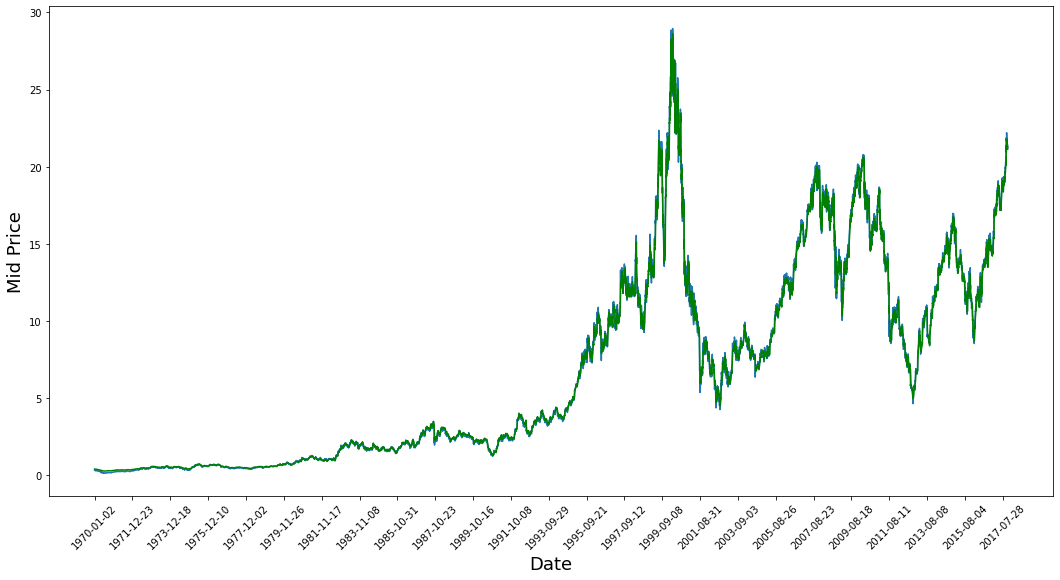

In [28]:
plt.figure(figsize = (18,9))
plt.plot(range(len(date[10:])),mid_prices[10:])
plt.plot(range(len(date[10:])),Salidas,color="green")
plt.xticks(range(0,len(date),500),date[0::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()